# Reproducing Figure 2A-D

Figure 2 presents results from sensitivity analysis of configuration 1.

## Parameters

In these figures, we vary:

* **Number of outpatients per day**:
    * 170 (same as config 4)
    * 85
    * 65
* **Average service time for outpatients** - mean (SD):
    * 0.87 (0.21) (same as config 1)
    * 2.5 (0.5)
    * 5 (1)

To calculate inter-arrival times from those numbers per day, based on article description and the provided patient counts and equivalent IAT, understand the method for calculation to be **round(60/(n/8.5))**,  where n is the number of arrivals per day. As such...

In [1]:
# Calculation of inter-arrival times
print(f'For 170 outpatients, use IAT (rounded to nearest int): {60/(170/8.5)}')
print(f'For 85 outpatients, use IAT (rounded to nearest int): {60/(85/8.5)}')
print(f'For 65 outpatients, use IAT (rounded to nearest int): {60/(65/8.5)}')

For 170 outpatients, use IAT (rounded to nearest int): 3.0
For 85 outpatients, use IAT (rounded to nearest int): 6.0
For 65 outpatients, use IAT (rounded to nearest int): 7.846153846153846


## Set up

In [2]:
# To run model
import PHC

# To import results and produce figures
import xlrd
import pandas as pd
import os
import matplotlib.pyplot as plt

## Run model

As this is a variation on configuration 1 (which is the default parameters in PHC.py), we just need to input the varying number of outpatients and service time.

In [3]:
# TODO: Run with 100 replications

arr170 = {
    'OPD_iat': 3,
    'rep_file': 'arr170.xls',
}

arr85 = {
    'OPD_iat': 6,
    'rep_file': 'arr85.xls',
}

arr65 = {
    'OPD_iat': 8,
    'rep_file': 'arr65.xls',
}

'''
serv087 = {
    'mean': 0.87,
    'sd': 0.21,
    'consult_boundary_1': 0.5,  # From PHC.py
    'consult_boundary_2': 0.3,  # From PHC.py
}

serv25 = {
    'mean': 2.5,
    'sd': 0.5
#   'consult_boundary_1': ,  # What is it?
#   'consult_boundary_2': ,  # What is it?
}

serv5 = {
    'mean': 5,
    'sd': 1,
    'consult_boundary_1': 2,  # From config 4
    'consult_boundary_2': 2,  # From config 4
}
'''

"\nserv087 = {\n    'mean': 0.87,\n    'sd': 0.21,\n    'consult_boundary_1': 0.5,  # From PHC.py\n    'consult_boundary_2': 0.3,  # From PHC.py\n}\n\nserv25 = {\n    'mean': 2.5,\n    'sd': 0.5\n#   'consult_boundary_1': ,  # What is it?\n#   'consult_boundary_2': ,  # What is it?\n}\n\nserv5 = {\n    'mean': 5,\n    'sd': 1,\n    'consult_boundary_1': 2,  # From config 4\n    'consult_boundary_2': 2,  # From config 4\n}\n"

In [4]:
# Input configuration parameters to main() (have to append with 's_', and
# add ** as inputting dict as parameters)
# for config in [arr170, arr85, arr65]:
#     print(f'''Running: {config['rep_file']}''')
#     PHC.main(**{f's_{k}': v for k, v in config.items()})

## Import results

In [5]:
# List of files to loop through
files = ['arr170', 'arr85', 'arr65']

# Empty list to store results
result_list = []

for f in files:
    # Import .xls and convert to pandas dataframe
    book = xlrd.open_workbook(os.path.join('outputs', f'{f}.xls'))
    result = pd.read_excel(book, header=None, index_col=0)

    # Find mean from the replication
    # Save as dataframe, dropping the duplicate rows (NCD occ twice)
    res = pd.DataFrame({
        f.replace('arr', ''): result.mean(axis=1)
    }).drop_duplicates()

    # Remove index name
    res.index.name = None

    # Save to list
    result_list.append(res)

# Combine into single dataframe
summary = pd.concat(result_list, axis=1)
summary

,170,85,65
OPD patients,44133.800000,22135.600000,16680.500000
IPD patients,178.300000,185.100000,182.700000
ANC patients,368.400000,356.700000,362.100000
Del patients,359.200000,355.700000,359.900000
OPD Q wt,0.010248,0.004627,0.003585
Pharmacy Q wt,2.494080,0.458695,0.289600
Lab Q wt,3.937399,1.046911,0.701163
doc occ,0.311170,0.223914,0.201738
Lab patient list,253015.300000,127103.200000,96194.400000
OPD q len,0.008920,0.005293,0.002826


## Create Figure 2B

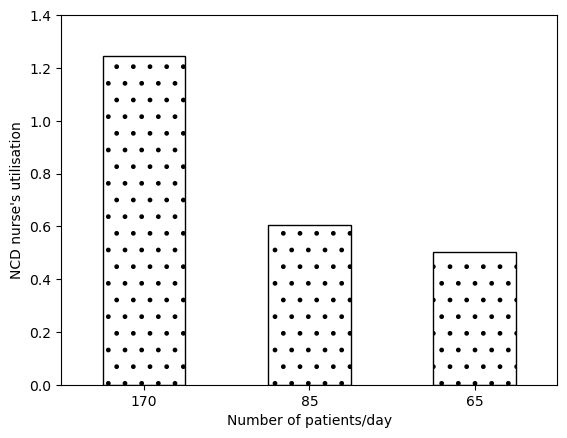

In [6]:
summary.loc['NCD occ'].plot.bar(edgecolor='black', color='white', hatch='.')
plt.xlabel('Number of patients/day')
plt.ylabel('''NCD nurse's utilisation''')
plt.ylim(0, 1.4)
plt.xticks(rotation=0)
plt.show()